In [16]:
import pandas as pd
import numpy as np
import sklearn
import sklearn as sk
from sklearn.model_selection import train_test_split
import torch
import math
import sys
import os
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
device = torch.device("cuda:0")

In [18]:
inDF = pd.read_csv('../inputData/87_GN2.csv')
inDF

,is2LSS0Tau,higgs_pt,MET_RefFinal_et,MET_RefFinal_phi,lep_Pt_0,lep_Eta_0,lep_Phi_0,lep_Pt_1,lep_Eta_1,lep_Phi_1,...,DRll01,nJets_OR_T,nJets_OR_T_MV2c10_70,HT,lead_jetPt,lead_jetEta,lead_jetPhi,sublead_jetPt,sublead_jetEta,sublead_jetPhi
0,1,333338.189446,78470.734375,-2.085715,601146.812500,-0.318361,-1.262946,24923.046875,0.463143,2.833681,...,2.322022,5,1,1.283018e+06,257838.671875,0.488685,2.003325,237875.140625,0.217035,1.640890
1,0,198891.226753,69186.234375,-1.497164,169835.171875,-1.389422,-0.004026,28883.621094,1.181011,1.422222,...,2.939610,7,1,1.061755e+06,270334.156250,-0.662692,3.016968,182996.890625,-0.670304,2.389921
2,0,127205.428913,17754.304688,-0.565061,68840.234375,-2.482988,0.193207,23197.248047,0.586430,-1.966086,...,3.752848,4,1,3.735435e+05,141029.125000,-0.446846,2.729666,55301.691406,0.235467,0.607342
3,0,186525.810970,18017.560547,0.664043,122887.976562,2.085977,-0.708433,24756.890625,0.103353,-3.139318,...,3.136877,5,2,6.399771e+05,171385.312500,2.431418,-2.257359,146500.187500,0.595055,1.604606
4,0,125398.523924,70879.484375,2.818805,90636.687500,-1.648999,2.535661,67340.296875,-0.906723,1.942545,...,0.950137,6,1,9.098727e+05,395196.718750,-1.078399,-1.177151,144179.375000,-1.460202,0.943286
5,0,152889.775501,104488.851562,-2.487104,58059.777344,-1.333305,-1.770700,22518.353516,1.523990,2.450425,...,3.523666,8,1,6.212844e+05,225744.968750,-2.067072,0.039336,80004.101562,-0.301783,2.904556
6,0,167072.828161,76153.195312,-0.449878,52171.503906,0.709635,-1.084756,19314.314453,-0.242049,-1.310441,...,0.978078,11,2,2.314774e+06,840291.375000,0.294757,1.271220,443252.500000,0.409675,-2.371373
7,0,356129.601861,141416.046875,2.087744,110797.281250,0.876741,2.621123,47847.570312,1.237321,2.784138,...,0.395717,7,2,7.830606e+05,169568.453125,0.551931,-1.143319,136047.937500,0.508245,-0.628183
8,0,48151.896727,76338.296875,-1.577242,38411.292969,0.872428,-0.501458,19857.238281,0.784763,0.247871,...,0.754440,6,1,3.958517e+05,113115.515625,1.711614,0.629632,69915.734375,1.416082,2.327547
9,0,25980.188064,9500.341797,-2.382867,48003.808594,0.110189,0.780710,33194.277344,0.495634,-2.171701,...,2.977465,4,1,3.745415e+05,113230.992188,1.316972,-0.132366,91994.718750,0.895585,2.820702


In [19]:
inDF = pd.read_csv('../inputData/87_GN2.csv')
inDF = inDF[inDF['is2LSS0Tau']==1]
#inDF.loc[ inDF['higgs_pt'] <= 250000, 'higgs_pt'] = 0
#inDF.loc[ inDF['higgs_pt'] > 250000, 'higgs_pt'] = 1
pd_train, pd_test = train_test_split(inDF, test_size=0.3)

In [20]:
y_test = pd_test['higgs_pt']
y_train = pd_train['higgs_pt']
pd_train = pd_train.drop(['higgs_pt'],axis=1)                                                                                                         
pd_test = pd_test.drop(['higgs_pt'],axis=1) 

In [21]:
#Convert data to tensors
x_train = torch.tensor(pd_train.values, dtype=torch.float32)
x_test = torch.tensor(pd_test.values, dtype=torch.float32)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

In [22]:
X = x_train
Y = y_train

X_test = x_test
Y_test = y_test

In [23]:
def normalize(x):
    x_normed = x / x.max(0, keepdim=True)[0]
    return x_normed

In [24]:
X = normalize(X)
Y = normalize(Y)

X_test = normalize(X_test)
Y_test = normalize(Y_test)

In [25]:
class OldNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(50, 50)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 100)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(100, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
oldNet = OldNet()
#opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [26]:
class Net(nn.Module):
    
    def __init__(self, D_in, nodes, layers):
        self.layers = layers
        super().__init__()
        self.fc1 = nn.Linear(D_in, nodes)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        #self.fc2 = nn.Linear(50, 100)
        self.fc = nn.Linear(nodes, nodes)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(nodes, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        h1 = self.dout(self.relu1(self.fc1(input_)))
        for i in range(self.layers):
            h1 = self.dout(self.relu1(self.fc(h1)))
        a1 = self.out(h1)
        y = self.out_act(a1)
        return y

In [27]:

def train_epoch_batch(model, opt, criterion, batch_size=10000):
    model.train()
    #losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(X)
        # (2) Compute diff
        loss = criterion(y_hat[:,0], Y)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        #losses.append(loss.data.numpy())
    
    return loss, y_hat[:,0]

In [28]:
def train_epoch(model, opt, criterion, batch_size=10000):
    model.train()
    #losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = net(X)
    # (2) Compute diff
    loss = criterion(y_hat[:,0], Y)
    # (3) Compute gradients
    loss.backward()
    # (4) update weights
    opt.step()        
    #losses.append(loss.data.numpy())
    
    return loss, y_hat[:,0]

In [29]:
class param:
    def __init__(self, epochs, layers, nodes, auc = 0, loss = 1):
        self.epochs = epochs
        self.layers = layers
        self.nodes = nodes
        self.auc = auc
        self.train_loss = None
        self.test_loss = None
        self.y_pred = None
        self.y_pred_test = None
        self.net = None
    

In [30]:
num_epochs = [4000]
nLayers = [4, 6, 8, 12]
nNodes = [75, 150, 250]

param_grid = []
for ep in num_epochs:
    for la in nLayers:
        for node in nNodes:
            param_grid.append(param(ep, la, node))

In [31]:
def scale_pt(y_predicted):
    y_pred_scaled = (y_predicted-y_predicted.min())/(y_predicted.max()-y_predicted.min())
    return y_pred_scaled

In [ ]:
#last_p = [param_grid[3]]
for p in param_grid:
#for p in last_p:
    net = Net(pd_train.shape[1], p.nodes, p.layers)
    opt = optim.Adam(net.parameters(), lr=0.0001, betas=(0.9, 0.999))
    criterion = nn.L1Loss()
    y_pred = []
    y_test_pred=[]
    e_losses = []
    test_losses = []
    
    for e in range(p.epochs):
        e_loss, y_pred = train_epoch(net, opt, criterion) 
        #e_losses.append(loss)
        if e%50==0:
            y_pred_test = net(X_test)[:,0]
            test_loss = criterion(y_pred_test, Y_test).float().detach().numpy()
            test_losses.append(test_loss)
            print("[Epoch]: %i, [Train Loss]: %.4f, [Test Loss]: %.4f" % (e, e_loss, test_loss))
            if e>300 and test_losses[-2]-test_losses[-1]<10e-8: 
                p.epochs=e
                break
    
    p.net = net
    p.train_loss = e_loss.float().detach().numpy()
    p.test_loss = test_loss
    p.y_pred_test = y_pred_test.float().detach().numpy()
    p.y_pred = y_pred.float().detach().numpy()
    #p.auc = sk.metrics.roc_auc_score(y_train,y_predicted)
    
    print("Nodes: "+str(p.nodes))
    print("Layers: "+str(p.layers))
    print("Train Loss: "+str(p.train_loss))
    print("Test Loss: "+str(p.test_loss))
    print("")
    
    del net, opt, criterion, y_pred, y_pred_test

[Epoch]: 0, [Train Loss]: 0.3715, [Test Loss]: 0.3711
[Epoch]: 50, [Train Loss]: 0.3527, [Test Loss]: 0.3522
[Epoch]: 100, [Train Loss]: 0.2964, [Test Loss]: 0.2940
[Epoch]: 150, [Train Loss]: 0.0816, [Test Loss]: 0.0795
[Epoch]: 200, [Train Loss]: 0.0684, [Test Loss]: 0.0683
[Epoch]: 250, [Train Loss]: 0.0673, [Test Loss]: 0.0675
[Epoch]: 300, [Train Loss]: 0.0666, [Test Loss]: 0.0667
[Epoch]: 350, [Train Loss]: 0.0661, [Test Loss]: 0.0662
[Epoch]: 400, [Train Loss]: 0.0656, [Test Loss]: 0.0657
[Epoch]: 450, [Train Loss]: 0.0651, [Test Loss]: 0.0651
[Epoch]: 500, [Train Loss]: 0.0646, [Test Loss]: 0.0646
[Epoch]: 550, [Train Loss]: 0.0640, [Test Loss]: 0.0642
[Epoch]: 600, [Train Loss]: 0.0635, [Test Loss]: 0.0635
[Epoch]: 650, [Train Loss]: 0.0629, [Test Loss]: 0.0630
[Epoch]: 700, [Train Loss]: 0.0621, [Test Loss]: 0.0623
[Epoch]: 750, [Train Loss]: 0.0614, [Test Loss]: 0.0615
[Epoch]: 800, [Train Loss]: 0.0607, [Test Loss]: 0.0608
[Epoch]: 850, [Train Loss]: 0.0599, [Test Loss]: 0.

In [21]:
param_grid[2].y_pred

array([0.12140456, 0.0939497 , 0.09836164, ..., 0.05742204, 0.07746226,
       0.02158123], dtype=float32)

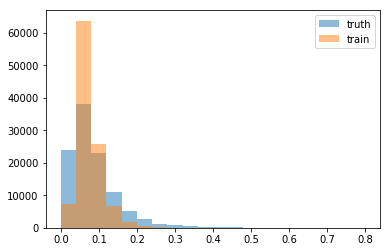

In [59]:
plt.hist(Y, 20, log=False, range=(0, 0.8), alpha=0.5, label='truth')
plt.hist(param_grid[5].y_pred, 20, log=False, range=(0, 0.8), alpha=0.5, label='train')
plt.legend(loc='upper right')
plt.show()

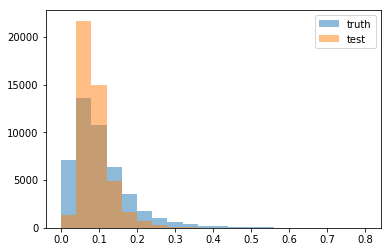

In [58]:
plt.hist(Y_test, 20, log=False, range=(0, 0.8), alpha=0.5, label='truth')
plt.hist(param_grid[2].y_pred_test,20, log=False, range=(0, 0.8), alpha=0.5, label='test')
plt.legend(loc='upper right')
plt.show()

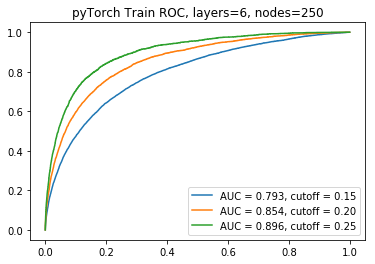

In [60]:
#y_predicted = y_pred.float().detach().numpy()
cutoff = [0.15, 0.2, 0.25]

plt.figure()
for c in cutoff:
    yTrain = np.where(Y > c, 1, 0)
    ypTrain = param_grid[5].y_pred

    auc = sk.metrics.roc_auc_score(yTrain,ypTrain)
    fpr, tpr, _ = sk.metrics.roc_curve(yTrain,ypTrain)

    plt.plot(fpr, tpr, label='AUC = %.3f, cutoff = %0.2f' %(auc, c))

plt.title("pyTorch Train ROC, layers=%i, nodes=%i" %(param_grid[5].layers, param_grid[5].nodes))
plt.legend(loc='lower right')    
plt.show()

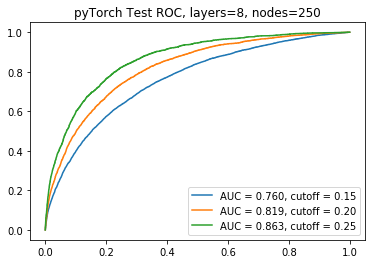

In [61]:
#y_predicted = y_pred.float().detach().numpy()
cutoff = [0.15, 0.2, 0.25]

plt.figure()
for c in cutoff:
    yTest = np.where(Y_test > c, 1, 0)
    ypTest = param_grid[8].y_pred_test

    auc = sk.metrics.roc_auc_score(yTest,ypTest)
    fpr, tpr, _ = sk.metrics.roc_curve(yTest,ypTest)

    plt.plot(fpr, tpr, label='AUC = %.3f, cutoff = %0.2f' %(auc, c))

plt.title("pyTorch Test ROC, layers=%i, nodes=%i" %(param_grid[8].layers, param_grid[8].nodes))
plt.legend(loc='lower right')    
plt.show()

Predict on test sample

In [ ]:
x_test, y_test = Variable(x_test, volatile=True), Variable(y_test)

In [ ]:
#y_pred_test = y_pred_test.detach().numpy()
auc = sk.metrics.roc_auc_score(y_test,y_pred_test)

roc_array = sk.metrics.roc_curve(y_test,y_pred_test)

plt.figure()
plt.plot(roc_array[1], label='AUC = '+str(auc))
plt.title("pytorch test ROC")
plt.legend(loc='lower right')